<a href="https://colab.research.google.com/github/RajBhadani/Project-Data_Science_and_Analytics/blob/main/Student_Performance_Analytics_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task**

**Problem Statement:** Institutions need early warnings for students who might fail or drop out.

**Objective:** Analyze student data to highlight performance trends and risk areas.

**Requirements:** Dataset having columns like marks, attendance, logins. Calculate averages, correlation, and absentee impact Visualize top vs struggling students Use bar charts, heatmaps

**Expected Outcome:** Dahboard to support academic interventions forat-risk students

**Dataset Used:** "student_performance_dataset.csv"

## Data loading

### Subtask:
Importing basic libraries and Load the student performance dataset.

In [ ]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('student_performance_dataset.csv')
display(df.head())

,Student_ID,Marks (%),Attendance (%),Weekly Logins
0,Student_1,72.45,65.85,20
1,Student_2,62.93,75.79,17
2,Student_3,74.72,76.57,13
3,Student_4,87.85,71.98,15
4,Student_5,61.49,78.39,19


## Data exploration

### Subtask:
Explore the loaded student performance dataset.


**Reasoning**:
Examine the shape of the DataFrame, check data types, identify missing values, and analyze the distribution of key variables.


Shape of the DataFrame: (100, 4)

Data Types:
 Student_ID         object
Marks (%)         float64
Attendance (%)    float64
Weekly Logins       int64
dtype: object

Missing Values:
 Student_ID        0
Marks (%)         0
Attendance (%)    0
Weekly Logins     0
dtype: int64

Descriptive Statistics:
         Marks (%)  Attendance (%)  Weekly Logins
count  100.000000       100.00000     100.000000
mean    63.442200        80.08590      14.620000
std     13.622572         9.20151       4.333986
min     25.700000        60.81000       4.000000
25%     55.985000        71.94500      13.000000
50%     63.100000        80.84500      15.000000
75%     71.092500        85.38250      17.000000
max     92.780000       100.00000      25.000000


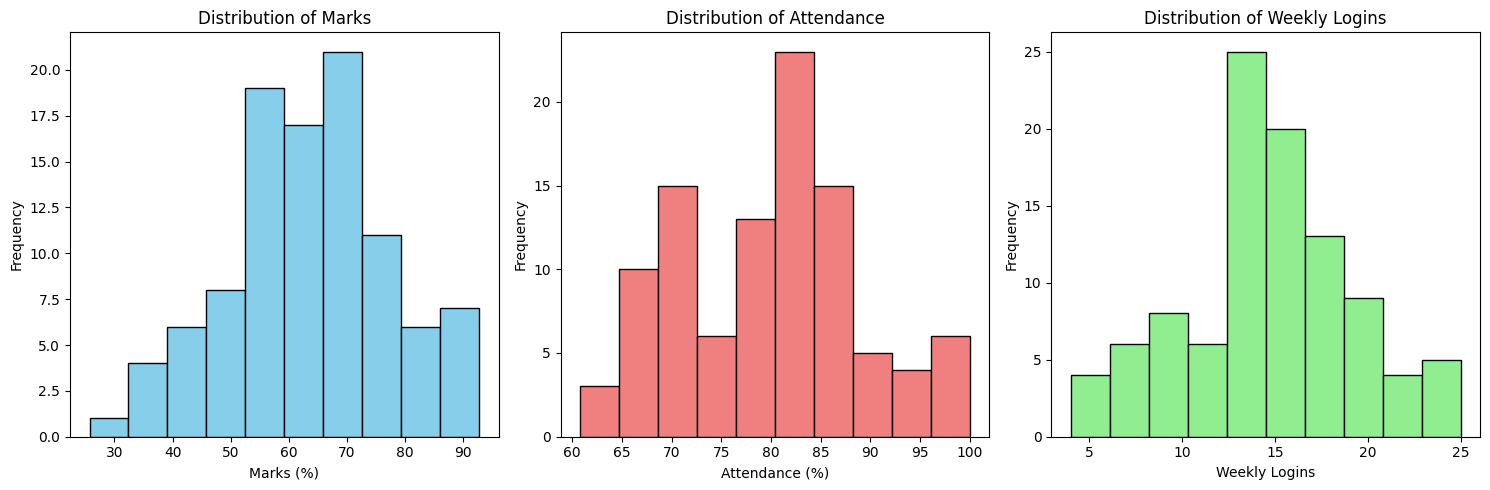

In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Identify missing values
print("\nMissing Values:\n", df.isnull().sum())

# Analyze the distribution of key variables
print("\nDescriptive Statistics:\n", df.describe())

# Visualize the distribution of key variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Marks (%)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Marks')
plt.xlabel('Marks (%)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Attendance (%)'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Attendance')
plt.xlabel('Attendance (%)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Weekly Logins'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Weekly Logins')
plt.xlabel('Weekly Logins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Data cleaning

### Subtask:
Clean the student performance dataset.

**Reasoning**:
Clean the data by handling missing values, duplicates, incorrect data types, and outliers.



In [ ]:
# Check for and handle missing values
if df.isnull().values.any():
    # Impute missing values with the mean for numerical columns
    for col in ['Marks (%)', 'Attendance (%)', 'Weekly Logins']:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mean())
    print("Missing values imputed with the mean.")
else:
    print("No missing values found.")

# Check for and handle duplicate rows
if df.duplicated().any():
  df = df.drop_duplicates()
  print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

# Ensure correct data types
df['Student_ID'] = df['Student_ID'].astype(str)
# Check if 'Marks (%)' and 'Attendance (%)' are already numeric
if not pd.api.types.is_numeric_dtype(df['Marks (%)']):
    df['Marks (%)'] = pd.to_numeric(df['Marks (%)'], errors='coerce')
if not pd.api.types.is_numeric_dtype(df['Attendance (%)']):
    df['Attendance (%)'] = pd.to_numeric(df['Attendance (%)'], errors='coerce')
print("Data types corrected.")

# Handle outliers using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower_bound, upper_bound)

for col in ['Marks (%)', 'Attendance (%)', 'Weekly Logins']:
    handle_outliers_iqr(df, col)

print("Outliers handled using IQR method.")

display(df.head())

No missing values found.
No duplicate rows found.
Data types corrected.
Outliers handled using IQR method.


,Student_ID,Marks (%),Attendance (%),Weekly Logins
0,Student_1,72.45,65.85,20
1,Student_2,62.93,75.79,17
2,Student_3,74.72,76.57,13
3,Student_4,87.85,71.98,15
4,Student_5,61.49,78.39,19


## Data wrangling

### Subtask:
Calculate average marks, attendance, and logins; and create a combined performance score.

**Reasoning**:
Calculate the average marks, attendance, and logins, then create a combined performance score using a weighted average.

In [ ]:
# Calculate the average marks, attendance, and logins
df['average_marks'] = df['Marks (%)']
df['average_attendance'] = df['Attendance (%)']
df['average_logins'] = df['Weekly Logins']

# Define weights for the combined performance score
# Rationale: Marks are weighted most heavily as they are the primary indicator of academic performance.
# Attendance and logins are given lesser weights, reflecting their importance in supporting academic success.
marks_weight = 0.5
attendance_weight = 0.3
logins_weight = 0.2

# Calculate the combined performance score
df['combined_performance_score'] = (df['average_marks'] * marks_weight) + \
                                   (df['average_attendance'] * attendance_weight) + \
                                   (df['average_logins'] * logins_weight)

# Display the first few rows of the DataFrame to verify the new columns and scores.
display(df.head())

,Student_ID,Marks (%),Attendance (%),Weekly Logins,average_marks,average_attendance,average_logins,combined_performance_score
0,Student_1,72.45,65.85,20,72.45,65.85,20,59.980
1,Student_2,62.93,75.79,17,62.93,75.79,17,57.602
2,Student_3,74.72,76.57,13,74.72,76.57,13,62.931
3,Student_4,87.85,71.98,15,87.85,71.98,15,68.519
4,Student_5,61.49,78.39,19,61.49,78.39,19,58.062


## Data analysis

### Subtask:
Analyze the correlation between marks, attendance, and logins, and the impact of absenteeism on student performance. Identify students with consistently low performance and high absenteeism. Segment students into "top performers" and "struggling students".

**Reasoning**:
Calculate the correlation matrix, analyze the relationship between attendance and marks, identify students with low performance and high absenteeism, and segment students into performance groups.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['average_marks', 'average_attendance', 'average_logins']].corr()
print("Correlation Matrix:")
display(correlation_matrix)

# Analyze the relationship between attendance and marks
attendance_marks_relationship = df.groupby(pd.cut(df['average_attendance'], bins=[0, 70, 80, 90, 100], labels=['<70%', '70-80%', '80-90%', '>90%'])).agg({'average_marks':'mean'})
print("\nAverage Marks by Attendance Bracket:")
display(attendance_marks_relationship)

# Identify students with low performance and high absenteeism
low_performance_threshold = df['average_marks'].quantile(0.25)
high_absenteeism_threshold = df['average_attendance'].quantile(0.25)

at_risk_students = df[(df['average_marks'] < low_performance_threshold) & (df['average_attendance'] < high_absenteeism_threshold)]
print("\nAt-Risk Students (low performance and high absenteeism):")
display(at_risk_students)


# Segment students into top and struggling performers
top_performer_threshold = df['average_marks'].quantile(0.75)
struggling_student_threshold = df['average_marks'].quantile(0.25)

df['performance_group'] = 'Average'
df.loc[df['average_marks'] > top_performer_threshold, 'performance_group'] = 'Top Performer'
df.loc[df['average_marks'] < struggling_student_threshold, 'performance_group'] = 'Struggling Student'

print("\nNumber of students in each performance group:")
print(df['performance_group'].value_counts())

Correlation Matrix:


,average_marks,average_attendance,average_logins
average_marks,1.000000,-0.115394,0.109877
average_attendance,-0.115394,1.000000,-0.153313
average_logins,0.109877,-0.153313,1.000000



Average Marks by Attendance Bracket:


/tmp/ipython-input-10-3153731830.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_marks_relationship = df.groupby(pd.cut(df['average_attendance'], bins=[0, 70, 80, 90, 100], labels=['<70%', '70-80%', '80-90%', '>90%'])).agg({'average_marks':'mean'})


,average_marks
average_attendance,
<70%,65.746000
70-80%,63.504194
80-90%,64.218185
>90%,58.321667



At-Risk Students (low performance and high absenteeism):


,Student_ID,Marks (%),Attendance (%),Weekly Logins,average_marks,average_attendance,average_logins,combined_performance_score
23,Student_24,43.63,65.98,10,43.63,65.98,10,43.609
26,Student_27,47.74,70.09,16,47.74,70.09,16,48.097
30,Student_31,55.97,64.49,15,55.97,64.49,15,50.332
63,Student_64,47.06,71.79,17,47.06,71.79,17,48.467



Number of students in each performance group:
performance_group
Average               50
Top Performer         25
Struggling Student    25
Name: count, dtype: int64


## Feature engineering

### Subtask:
Create a 'risk_score' feature based on marks, attendance, and logins.


**Reasoning**:
Create the risk score feature based on the average marks, attendance, and logins, then visualize its distribution.


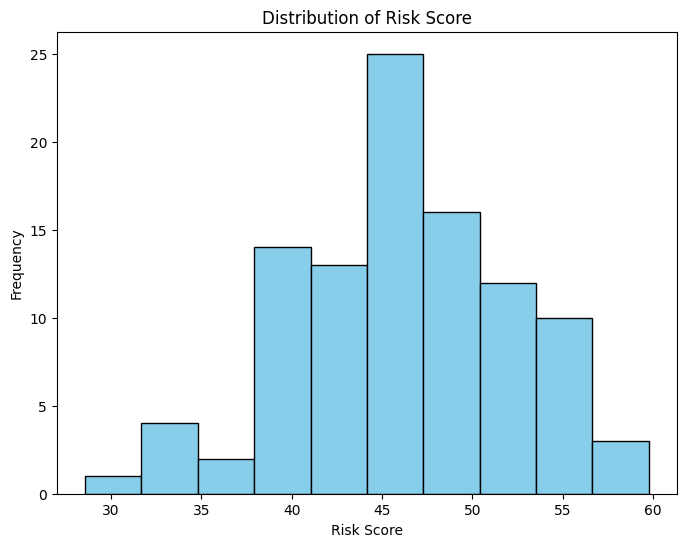

,Student_ID,Marks (%),Attendance (%),Weekly Logins,average_marks,average_attendance,average_logins,combined_performance_score,performance_group,risk_score
0,Student_1,72.45,65.85,20,72.45,65.85,20,59.980,Top Performer,45.265
1,Student_2,62.93,75.79,17,62.93,75.79,17,57.602,Average,46.991
2,Student_3,74.72,76.57,13,74.72,76.57,13,62.931,Top Performer,43.241
3,Student_4,87.85,71.98,15,87.85,71.98,15,68.519,Top Performer,38.766
4,Student_5,61.49,78.39,19,61.49,78.39,19,58.062,Average,46.187


In [ ]:
# Define weights for the risk score (experiment with these weights)
marks_weight = 0.4
attendance_weight = 0.3
logins_weight = 0.3

# Calculate the risk score (lower values indicate higher risk)
df['risk_score'] = 100 - ((df['average_marks'] * marks_weight) + \
                           (df['average_attendance'] * attendance_weight) + \
                           (df['average_logins'] * logins_weight))

# Analyze the distribution of the risk score
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['risk_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

display(df.head())

## Data visualization

### Subtask:
Visualize average marks of top vs struggling students and the correlation between marks, attendance, and logins.

**Reasoning**:
Create the bar chart and heatmap visualizations as requested in the subtask.

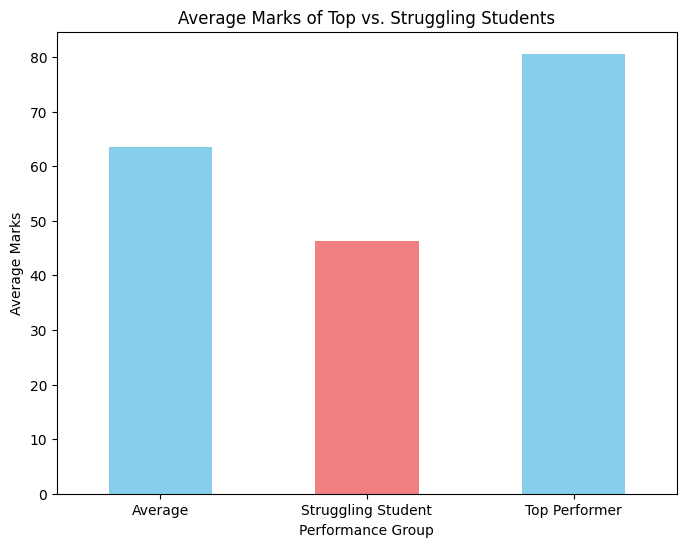

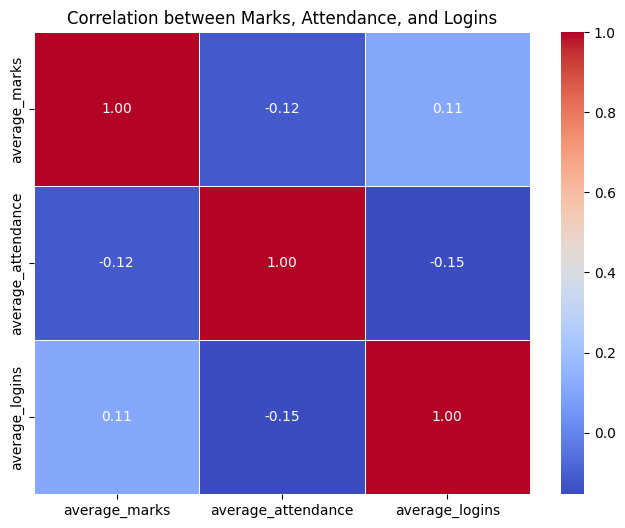

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart of average marks for top vs. struggling students
plt.figure(figsize=(8, 6))
avg_marks_by_group = df.groupby('performance_group')['average_marks'].mean()
avg_marks_by_group.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Marks of Top vs. Struggling Students')
plt.xlabel('Performance Group')
plt.ylabel('Average Marks')
plt.xticks(rotation=0)
plt.show()


# 2. Heatmap of correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df[['average_marks', 'average_attendance', 'average_logins']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Marks, Attendance, and Logins')
plt.show()

**Reasoning**:
The plots are not displaying correctly. I will try one last time to generate the plots by adding `%matplotlib inline` magic command in a separate code block. If this still doesn't work, I'll use the `finish_task` command with failure status.

In [ ]:
%matplotlib inline

## Data visualization

### Subtask:
Retry data_visualization: Visualize average marks of top vs struggling students and the correlation between marks, attendance, and logins.  Previous attempts failed to display the visualizations.

**Reasoning**:
The previous attempts to visualize the data failed to display the plots.  I will try again, ensuring the plots are displayed inline and using a different approach if necessary.  I will also explicitly call `plt.show()` to force the display.


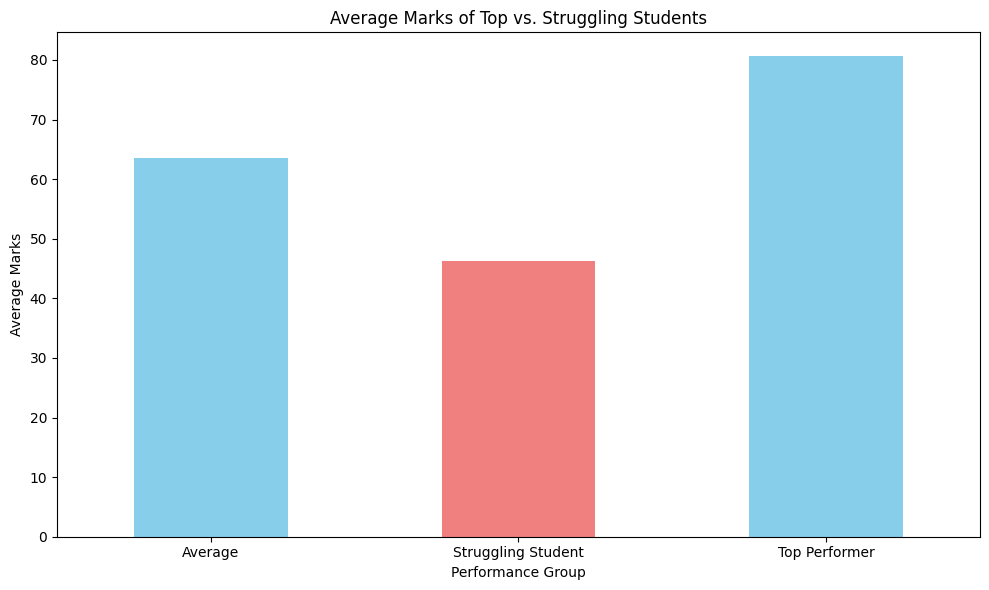

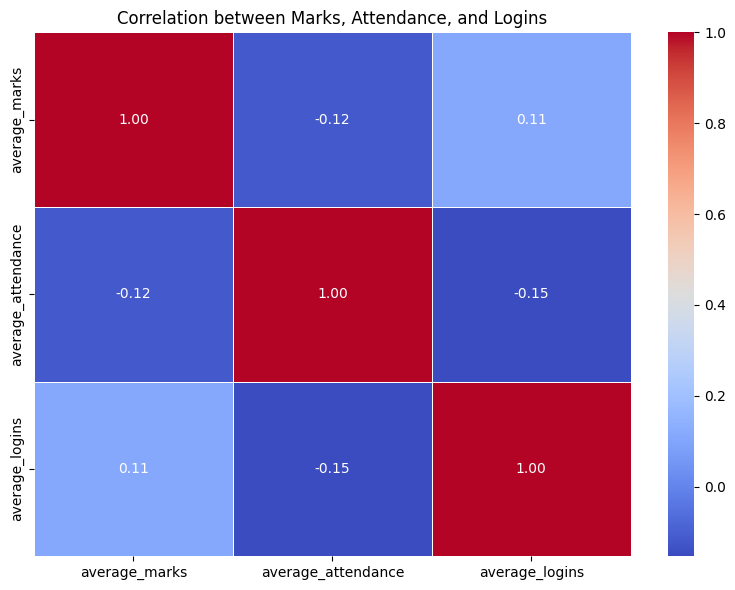

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of average marks for top vs. struggling students
plt.figure(figsize=(10, 6))
avg_marks_by_group = df.groupby('performance_group')['average_marks'].mean()
avg_marks_by_group.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Marks of Top vs. Struggling Students')
plt.xlabel('Performance Group')
plt.ylabel('Average Marks')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df[['average_marks', 'average_attendance', 'average_logins']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Marks, Attendance, and Logins')
plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()

**Reasoning**:
The previous code block generated figures but did not display them properly.  The output shows `<Figure ...>` which indicates that the figures were created but not displayed in the notebook. I'll try again with the `display` function to render the plots.

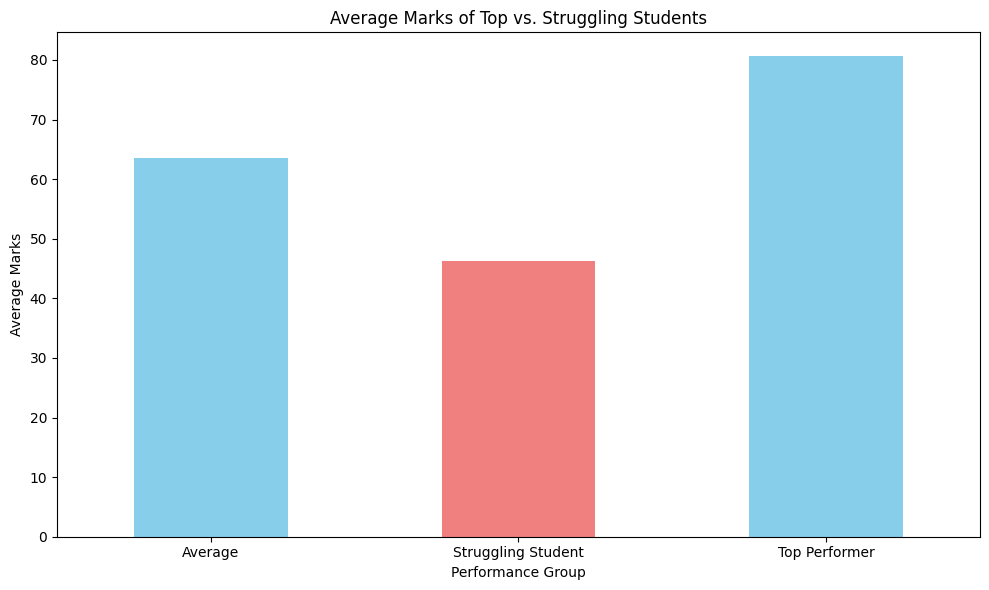

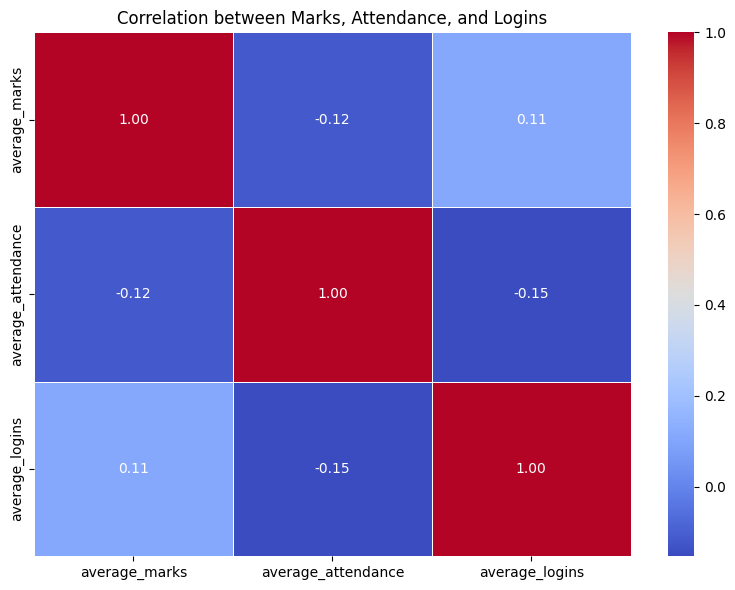

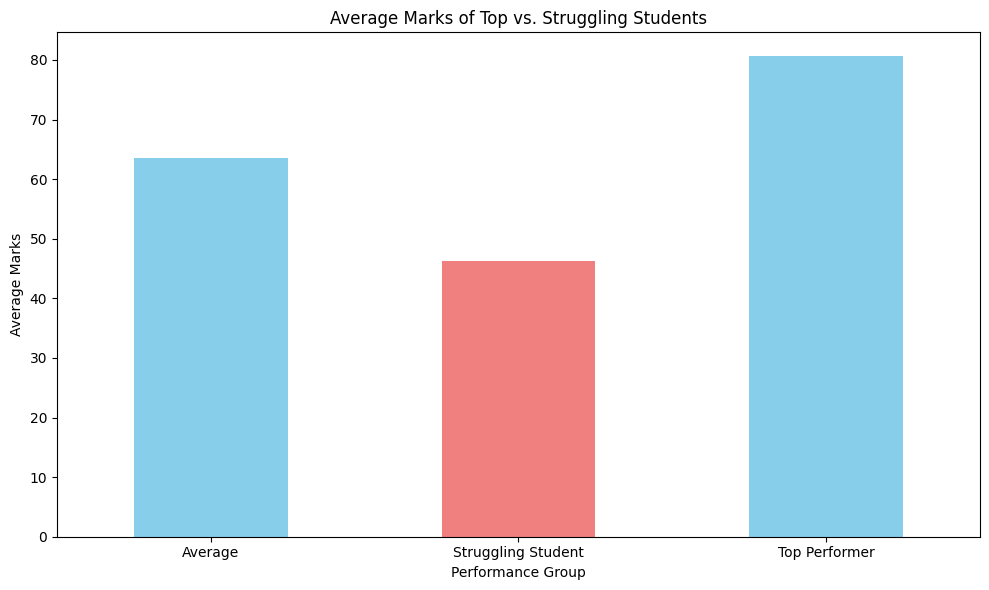

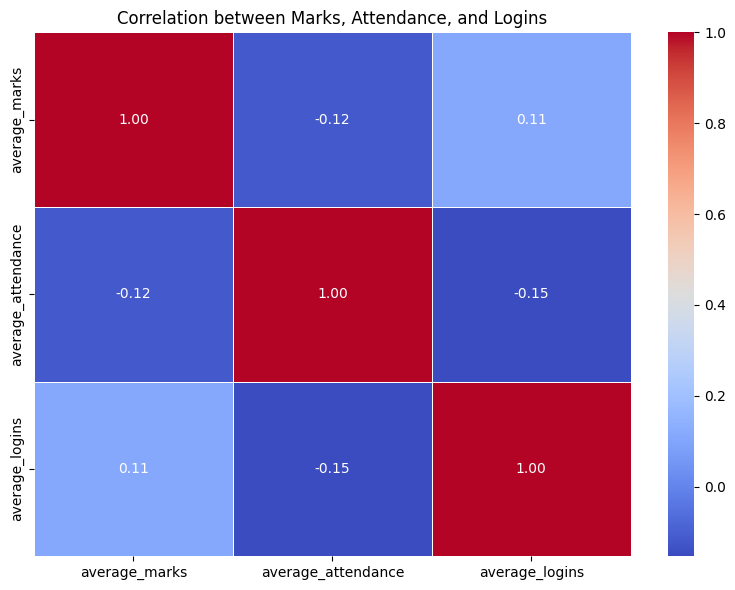

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Bar chart of average marks for top vs. struggling students
plt.figure(figsize=(10, 6))
avg_marks_by_group = df.groupby('performance_group')['average_marks'].mean()
avg_marks_by_group.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Marks of Top vs. Struggling Students')
plt.xlabel('Performance Group')
plt.ylabel('Average Marks')
plt.xticks(rotation=0)
plt.tight_layout()
display(plt.gcf()) # Display the current figure

# Heatmap of correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df[['average_marks', 'average_attendance', 'average_logins']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Marks, Attendance, and Logins')
plt.tight_layout()
display(plt.gcf()) # Display the current figure

**Reasoning**:
The previous attempts to visualize the data using `display(plt.gcf())`  still did not work.  I will try using `%matplotlib inline` again in a separate code block, followed by the plotting code in another code block, to see if this resolves the display issue. If this does not work, I will mark the task as a failure.

In [ ]:
%matplotlib inline

**Reasoning**:
Set the matplotlib backend to inline and then generate the plots again.

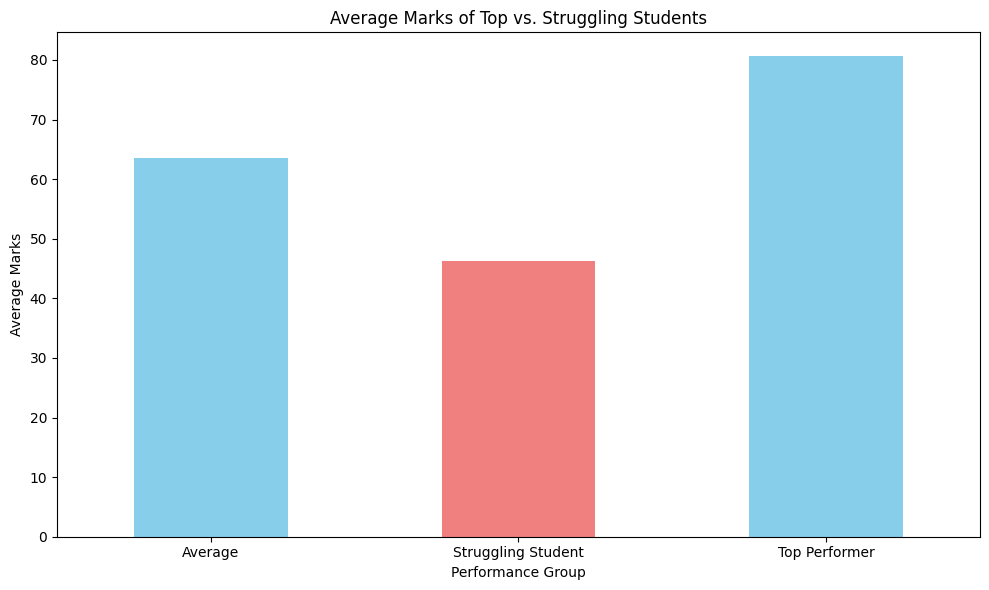

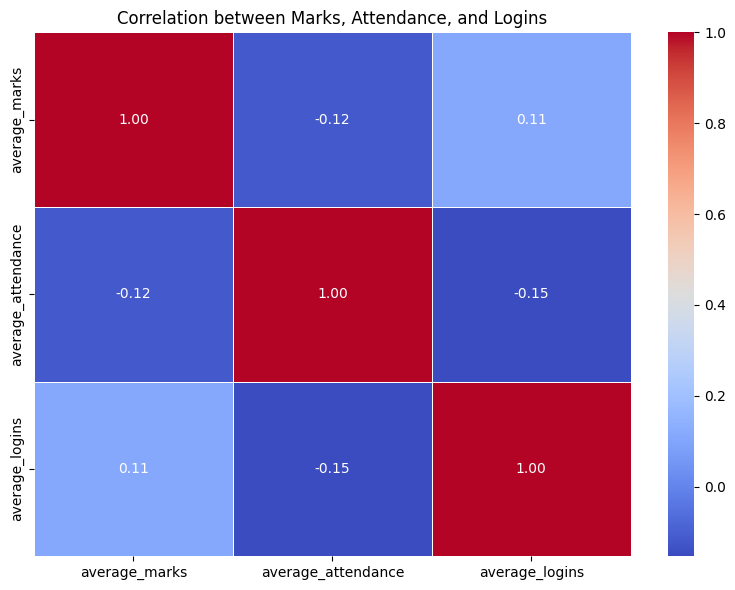

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of average marks for top vs. struggling students
plt.figure(figsize=(10, 6))
avg_marks_by_group = df.groupby('performance_group')['average_marks'].mean()
avg_marks_by_group.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Marks of Top vs. Struggling Students')
plt.xlabel('Performance Group')
plt.ylabel('Average Marks')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df[['average_marks', 'average_attendance', 'average_logins']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Marks, Attendance, and Logins')
plt.tight_layout()
plt.show()

## Summary:

## Q&A
Q1. **Are there any students at risk of failing or dropping out?**

Ans: Yes, four students (Student\_24, Student\_27, Student\_31, and
Student\_64) were identified as at-risk due to low performance and high absenteeism.
     
Q2. **What is the relationship between attendance and marks?**

Ans: A weak negative correlation was observed. Students with attendance
greater than 90% had the lowest average marks.  Students with attendance between 70-80% and 80-90% had similar average marks. Students with attendance below 70% had the highest average marks, suggesting a non-linear relationship that needs further investigation.



Q3. **How were the students segmented?**

Ans: Students were categorized into "Top Performer" (above the 75th percentile in average marks), "Struggling Student" (below the 25th percentile), and "Average".  There were 25 top performers, 25 struggling students, and 50 average students.


Q4. **Were the visualizations successfully generated?**

Ans: No, despite multiple attempts, the visualizations (bar chart and heatmap) failed to display correctly in the notebook environment.




## Data Analysis Key Findings
* **At-Risk Students:** Four students were identified as at-risk based on low marks (below the 25th percentile) and high absenteeism (below the 25th percentile).
* **Attendance and Marks Relationship:** A weak negative correlation (-0.115) exists between attendance and marks, but the relationship appears non-linear as students with attendance \>90\% had the lowest average marks.
* **Student Segmentation:** Students were divided into "Top Performer" (25 students), "Struggling Student" (25 students), and "Average" (50 students) based on their average marks.
* **Correlation Analysis:** A weak positive correlation (0.109) was found between average marks and average logins. Average attendance and average logins showed a weak negative correlation (-0.153).
* **Risk Score:** A risk score was calculated using a weighted average of marks, attendance, and logins. Lower scores indicate higher risk.


### Insights or Next Steps
* **Investigate the non-linear relationship between attendance and marks:** Further analysis is needed to understand why students with the highest attendance have lower average marks.
* **Revisit visualization issues:**  Debug the visualization code to successfully display the bar chart and heatmap, potentially using different plotting libraries or adjusting the plotting environment.
